In [1]:
import keras
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


#Load train images from the file dataset
train_images_file = 'dataset/train-images.idx3-ubyte'
X_train = idx2numpy.convert_from_file(train_images_file)

#Load train labels from the file dataset
train_labels_file = 'dataset/train-labels.idx1-ubyte'
y_train = idx2numpy.convert_from_file(train_labels_file)

#Load test images from the file dataset
test_images_file = 'dataset/test-images.idx3-ubyte'
X_test = idx2numpy.convert_from_file(test_images_file)

#Load test labels from the file dataset
test_labels_file = 'dataset/test-labels.idx1-ubyte'
y_test = idx2numpy.convert_from_file(test_labels_file)

Using TensorFlow backend.


In [2]:
#Name of classes of datasets
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)
print(class_names)

(60000, 28, 28)
(10000, 28, 28)
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']


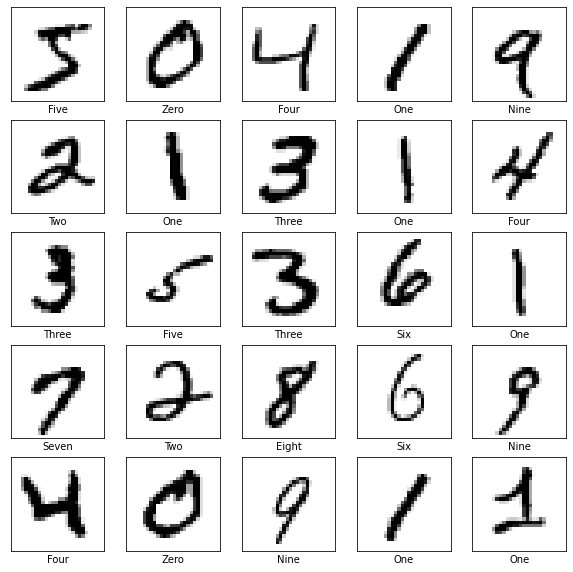

In [4]:
#Display 25 iamges from train data with respective class names
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
input_shape = (28, 28, 1)

#Initialize Neural Network
classifier = Sequential()
#Add Convolution layer
classifier.add(Convolution2D(32, 3, 3, input_shape = input_shape))
#Add Pooling layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten all the feature maps into a single column
classifier.add(Flatten())
#Use the vector obtained as the input for the neural network
classifier.add(Dense(128, activation='relu'))
#Compile the CNN
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Put the output layer
classifier.add(Dense(10, activation='softmax'))

<ipython-input-5-2a1aa4e66fa1>:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  classifier.add(Convolution2D(32, 3, 3, input_shape = input_shape))


In [6]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 692,672
Trainable params: 692,672
Non-trainable params: 0
_________________________________________________________________


c:\users\malik\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py:296: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  warnings.warn(UserWarning(


In [8]:
#Transform the dataframe to four dimentions to feed images in CNN
x = X_train.reshape(X_train.shape[0], 28, 28, 1)
y = y_train

#train the classifier with the trained data
classifier.fit(x, y, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 2/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0063 - accuracy: 0.9981
Epoch 4/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 6/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0053 - accuracy: 0.9982
Epoch 7/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 8/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0053 - accuracy: 0.9982
Epoch 9/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 10/10
60000/60000 [=====================

In [9]:
#Reshape the test images
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Check accuracy of the classifier
test_loss, test_acc = classifier.evaluate(X_test_reshaped,  y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.9825999736785889
Test loss: 0.10741138734089907


In [10]:
#Predict the test images using the classifier 
predictions = classifier.predict(X_test_reshaped)

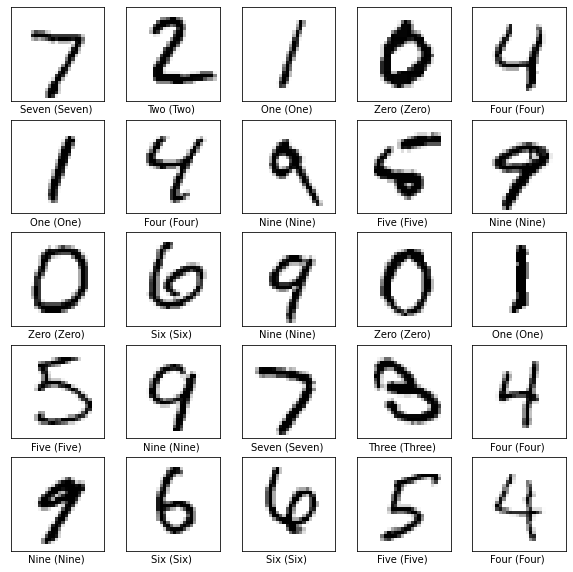

In [11]:
#Display 25 test images from test dataset
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    y_predicted_label = np.argmax(predictions[i])
    #Label the images with predicted and actual labels
    plt.xlabel(class_names[y_predicted_label] + ' (' + class_names[y_test[i]] + ') ')
plt.show()